In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib


In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
# finding % of null data in each column
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

In [8]:
df.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2 = df.drop(['availability','society','area_type','balcony'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
# finding % of null data in each column
df_null = round(100*(df2.isnull().sum())/len(df), 2)
df_null

location      0.01
size          0.12
total_sqft    0.00
bath          0.55
price         0.00
dtype: float64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
def sizetrim(x):
    x = x.split(" ")
    return int(x[0])
df3['bedrooms'] = df3['size'].apply(sizetrim)
df3.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16972\653650566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bedrooms'] = df3['size'].apply(sizetrim)


,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df4 = df3.drop(['size'],axis = 'columns')
df4.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [15]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# as we see ranges as well so we need to tackle them
def sqft(x):
    try:
        # Try converting x to a float
        x = float(x)
        return x
    except ValueError:
        # If it's not a valid float, split and calculate average
        if "-" in x:
            parts = x.split("-")
            try:
                avg = (float(parts[0]) + float(parts[1])) / 2
                return avg
            except ValueError:
                return None  # Handle invalid values as needed
        else:
            return None  # Handle other cases as needed

df4['total_sqfts'] = df4['total_sqft'].apply(sqft)

# df4['total_sqfts'] = df4['total_sqft'].apply(sqft)
# df4.head()
# sqft('456sq yard')

In [17]:
df4['price per sqft'] = (df4['price']*100000/df4['total_sqfts'])
df4.head()
# df4.loc[30]
# df4['total_sqft']*100000

,location,total_sqft,bath,price,bedrooms,total_sqfts,price per sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,1200,2.0,51.00,2,1200.0,4250.000000


In [18]:
len(df4['location'].unique())

1304

In [19]:
df4['location'] = df4['location'].apply(lambda x: str(x).strip())


st = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
print(st)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64


In [20]:
len(st[st<=10])

1052

In [21]:
locations_with_less_than_10_datapoints = st[st<=10]
locations_with_less_than_10_datapoints

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [22]:
len(df4.location.unique())

1293

In [23]:
# creating new column for these locations
df4.location = df4.location.apply(lambda x : 'other' if x in locations_with_less_than_10_datapoints else x)
len(df4.location.unique())

242

In [24]:
df4.head(10)

,location,total_sqft,bath,price,bedrooms,total_sqfts,price per sqft
0,Electronic City Phase II,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,1200,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,1170,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,2732,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,3300,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,1310,3.0,63.25,3,1310.0,4828.244275
9,other,1020,6.0,370.00,6,1020.0,36274.509804


In [25]:
df5 = df4.drop(['total_sqft'],axis = 'columns')
df5.head()

,location,bath,price,bedrooms,total_sqfts,price per sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


## outlier detection

In [26]:
 ## 1) considering their is 300sqft per bedroom , so getting homes with less than this:
df5[(df5.total_sqfts/df5.bedrooms)<300].head()

,location,bath,price,bedrooms,total_sqfts,price per sqft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000


## we see that 600sqfts and 8 bedrooms are not possible, similarly 1020sqfts with 6 bedrooms, so we remove these outliers

In [27]:
df5.shape

(13246, 6)

In [28]:
# considering avg sqft/bedroom as 300, so removing all homes with sqft/bedroom < 300
df6 = df5[((df5.total_sqfts/df5.bedrooms)>=300)]
df6.head()

,location,bath,price,bedrooms,total_sqfts,price per sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [29]:
df6.shape

(12456, 6)

In [30]:
# 2)  checking price per sqft
df6['price per sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price per sqft, dtype: float64

In [31]:
top = df6['price per sqft'].quantile(0.9)
top

10000.0

In [32]:
low = df6['price per sqft'].quantile(0.1)
low

3500.0

### 90% of data is above 3500 and below 10000

In [33]:
## using standard deviation method to remove outliers
def remove_out(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price per sqft'])
        st = np.std(subdf['price per sqft'])
        reduced_df = subdf[(subdf['price per sqft']>(m-st)) & (subdf['price per sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df7 = remove_out(df6)
df7.shape

(10241, 6)

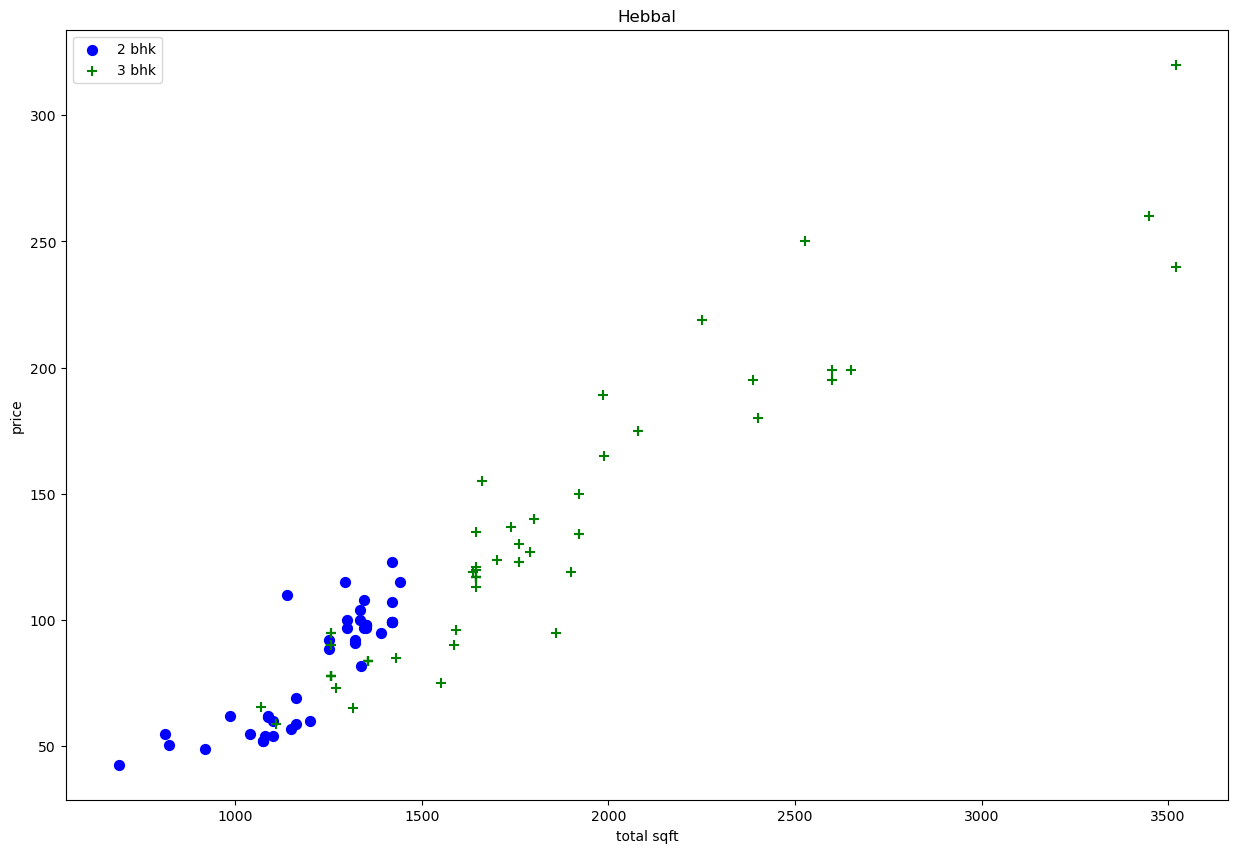

In [34]:
## 3) now we see that some 2 bedroom homes have higher price than 3 bedrooms, we need to clean that
def plot_scatter(df,locat):
    bhk2 = df[(df.location==locat) & (df.bedrooms==2)]
    bhk3 = df[(df.location==locat) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqfts,bhk2.price,color='blue',label = '2 bhk',s=50)
    plt.scatter(bhk3.total_sqfts,bhk3.price,color='green',marker='+',label = '3 bhk',s=50)
    plt.xlabel('total sqft')
    plt.ylabel('price')
    plt.title(locat)
    plt.legend()
    
plot_scatter(df7,"Hebbal")

In [35]:
# we can insert any location in above function to check if green(3 bed) have less price than blue(2 bed),, we now remove them
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bed_stats = {}
        for beds,beds_df in location_df.groupby('bedrooms'):
            bed_stats[beds] = {
                'mean' : np.mean(beds_df['price per sqft']),
                'std' : np.std(beds_df['price per sqft']),
                'count' : beds_df.shape[0]
            }
        for beds,beds_df in location_df.groupby('bedrooms'):
            stats = bed_stats.get(beds-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,beds_df[beds_df['price per sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis = 'index')

                                                                    
df8 = remove_bed_outliers(df7)       
df8.shape                                                                    

(7329, 6)

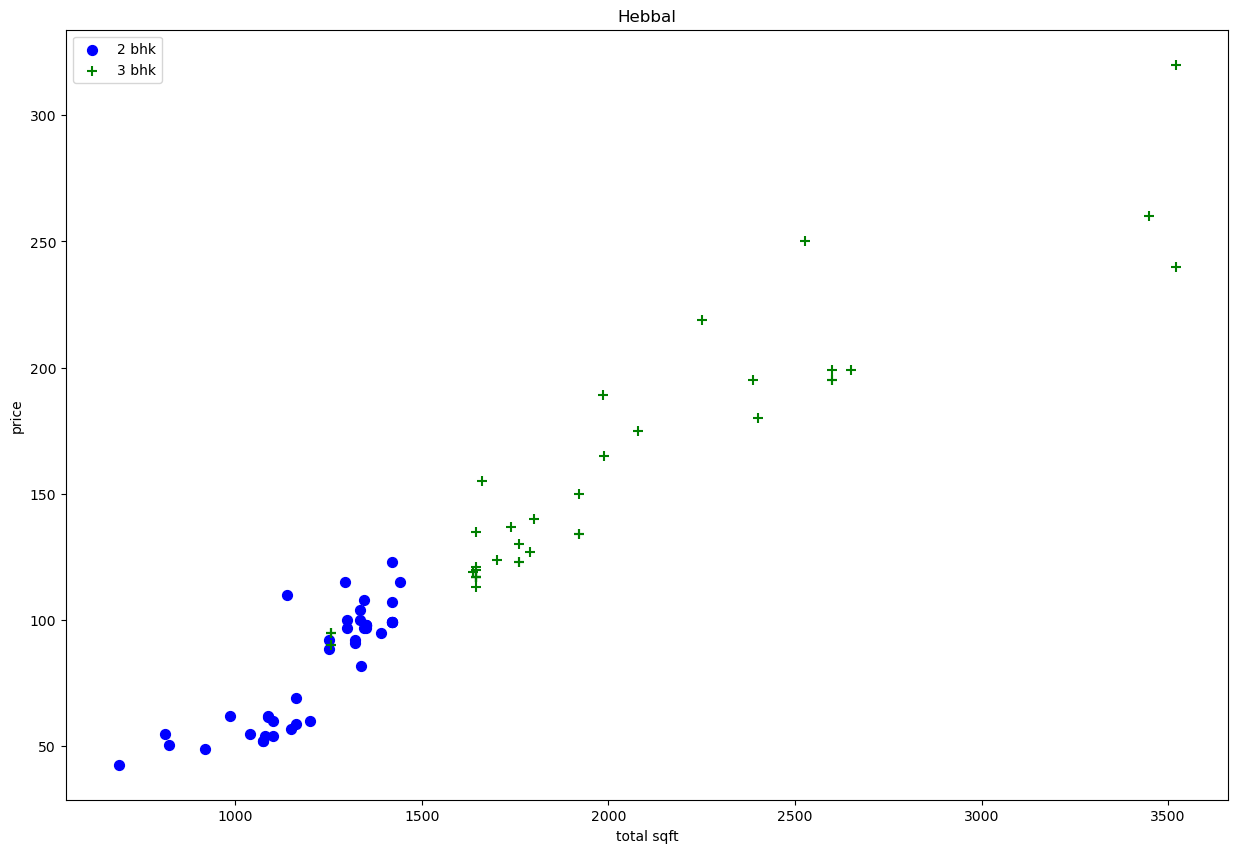

In [36]:
# again plotting the scatter plot   
plot_scatter(df8,"Hebbal")

Text(0, 0.5, 'count')

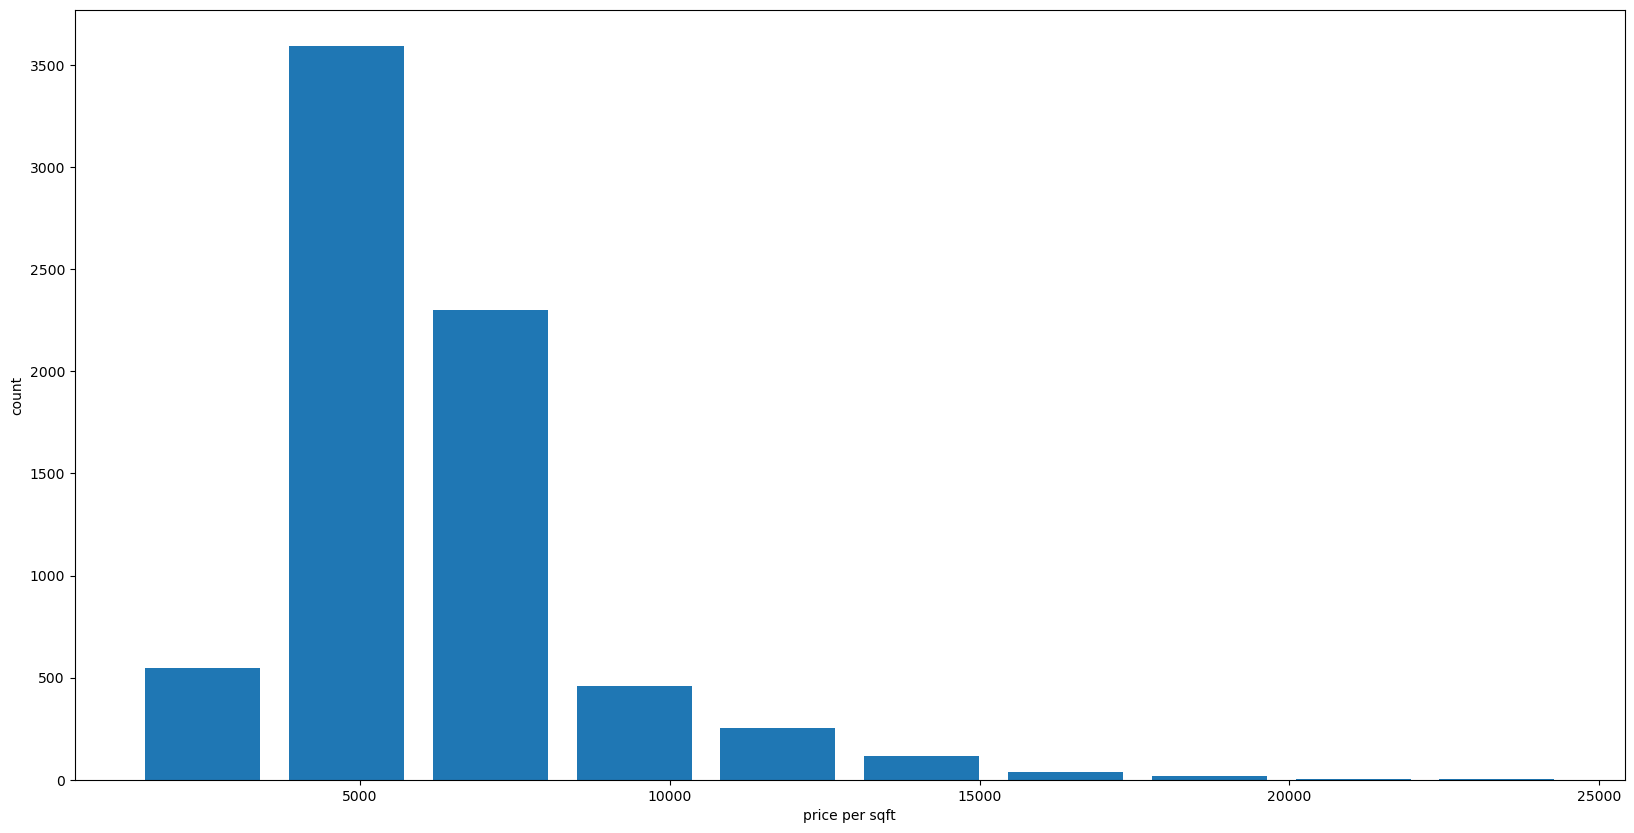

In [37]:
## 4) checking how many apartments are in majority in which sqft
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8["price per sqft"],rwidth = 0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")

## we see data is normally distributed, and most of the data pointsare below rs.10000 per sqft 

In [38]:
## lets explore bathrooms
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [39]:
## its strange to see 16 bathrooms in a house,
df8[df8["bath"]>10]

,location,bath,price,bedrooms,total_sqfts,price per sqft
5277,Neeladri Nagar,12.0,160.0,10,4000.0,4000.000000
8486,other,12.0,525.0,10,12000.0,4375.000000
8575,other,16.0,550.0,16,10000.0,5500.000000
9308,other,12.0,150.0,11,6000.0,2500.000000
9639,other,13.0,275.0,13,5425.0,5069.124424


Text(0, 0.5, 'count')

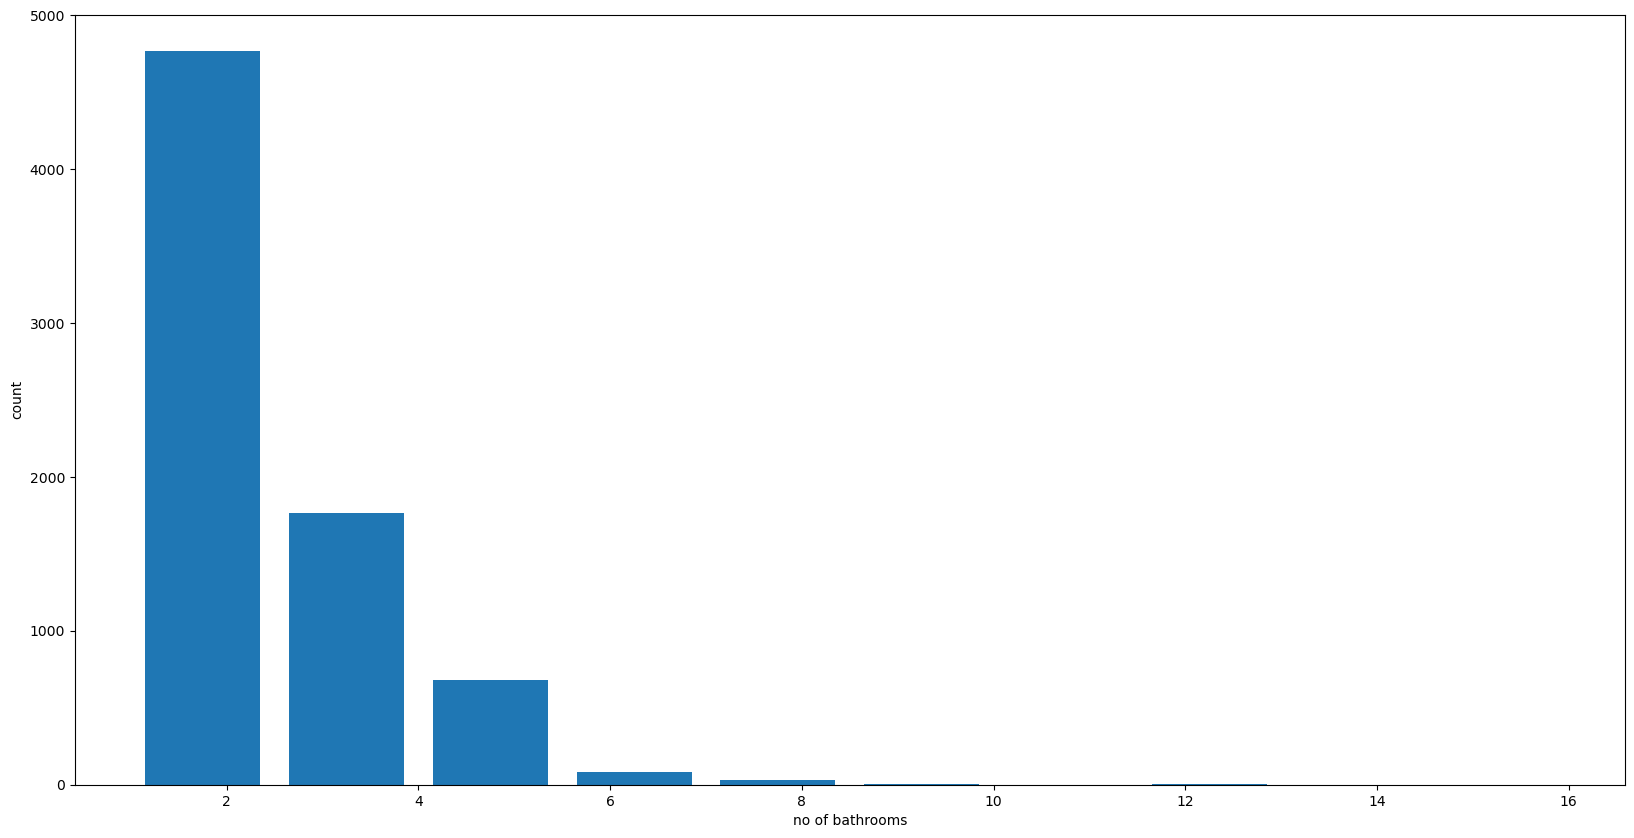

In [40]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("no of bathrooms")
plt.ylabel("count")

In [41]:
df8[df8.bath>df8.bedrooms+2]

,location,bath,price,bedrooms,total_sqfts,price per sqft
1626,Chikkabanavar,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,6.0,116.0,3,1806.0,6423.034330
8411,other,9.0,1000.0,6,11338.0,8819.897689


In [42]:
df9 = df8[df8.bath<df8.bedrooms+2]
df9.shape

(7251, 6)

In [43]:
df10 = df9.drop(['price per sqft'],axis = 'columns')
df10.shape

(7251, 5)

In [44]:
df10.head()

,location,bath,price,bedrooms,total_sqfts
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


## one hot encoding location


In [46]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# lets join these dummies to df10
df11 = pd.concat([df10,dummies],axis = 'columns')
# we can live with one less column, so we drop other
df11 = df11.drop(['other','location'],axis = 'columns')
df11.head()

,bath,price,bedrooms,total_sqfts,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,194.0,3,1630.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,235.0,3,1875.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,130.0,3,1200.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,148.0,2,1235.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df11.shape

(7251, 245)

In [50]:
# creating x and y
X = df11.drop(['price'],axis = 'columns')
X

,bath,bedrooms,total_sqfts,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,3,1630.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3,1875.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,3,1200.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,2,1235.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,2.0,2,1200.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,1.0,1,1800.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,2.0,2,1353.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,1.0,1,812.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
y = df11.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [52]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()

In [55]:
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874435

## we got 84.5% accuracy which is quite decent but as a data scientist we will try different models so doin k fold cross validation

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2 , random_state = 0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

### majority of times we get more than 80%, which is kinda good, moving on to hyper parameter tuning

In [61]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model(X, y):
    algos = {
        'linear regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming you have X and y defined
find_best_model(X, y)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear regression,0.819001,{'fit_intercept': False}
1,Lasso,0.687431,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.719726,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


## among these 3 models, we see that linear reg is best giving 81% accuracy, we already had achieved 84% accuracy, so we will use that model

In [65]:
## lets make predictions
def predict_price(location,sqft,bath,beds):
    loc_index = np.where(X.columns==location)[0][0]  # getting index of locations
    
    x=np.zeros(len(X.columns))
    x[0] = bath
    x[1] = beds
    x[2] = sqft
    if loc_index>=0 :
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [66]:
# making prediction of price in lacs
predict_price('1st Phase JP Nagar',1000,2,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904676988268

In [67]:
# for same location, same sqft, same baths, we will check price of 3 beds
predict_price('1st Phase JP Nagar',1000,2,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.7261690055637

In [ ]:
## this is what our data showed us that sometimes 2 beds have higher price than 3 for same location

In [68]:
# we now save our model in file
import pickle
with open('banglore_home_prices_model.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [69]:
# importing columns for predictions
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))